In [1]:
from qiskit import QuantumCircuit
circuit_2 = QuantumCircuit(2)

# Create a circuit with 2 qubits and 3 classical bits
circuit_2_3 = QuantumCircuit(2, 3)


ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [25]:
circuit_2_3.draw()

q_0: 
     
q_1: 
     
c: 3/

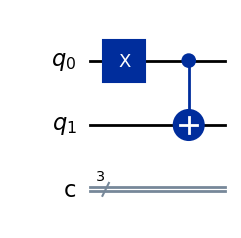

In [26]:
circuit_2_3 = QuantumCircuit(2, 3)

# X on the first qubit
circuit_2_3.x(0)
# CNOT between first and second qubit
circuit_2_3.cx(0, 1)

# Draw (using the nicer matplotlib-output style)
circuit_2_3.draw(output="mpl", style="iqp")

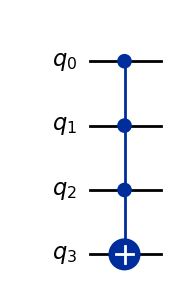

In [27]:
from qiskit.circuit.library import C3XGate
spec = QuantumCircuit(4)
spec.append(C3XGate(), [0,1,2,3])
spec.draw(output="mpl", style="iqp")

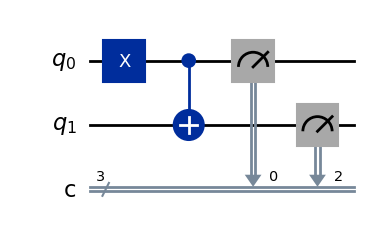

In [28]:
circuit_2_3 = QuantumCircuit(2, 3)

# X on the first qubit
circuit_2_3.x(0)
# CNOT between first and second qubit
circuit_2_3.cx(0, 1)

# measure qbit 0 and store value in classical bit 0
circuit_2_3.measure(0,0)
circuit_2_3.measure(1,2)
circuit_2_3.draw(output="mpl", style="iqp")

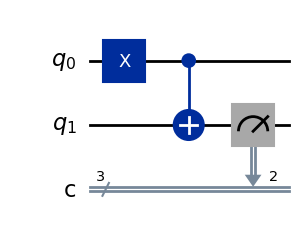

In [29]:
circuit_2_3 = QuantumCircuit(2, 3)

# X on the first qubit
circuit_2_3.x(0)
# CNOT between first and second qubit
circuit_2_3.cx(0, 1)
# measure qbit 1 and store value in classical bit 2
circuit_2_3.measure(1,2)
circuit_2_3.draw(output="mpl", style="iqp")

In [30]:
circuit_2_3 = QuantumCircuit(2)

# X on the first qubit
circuit_2_3.x(0)
# CNOT between first and second qubit
circuit_2_3.cx(0, 1)

circuit_2_3.measure_all()
circuit_2_3.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

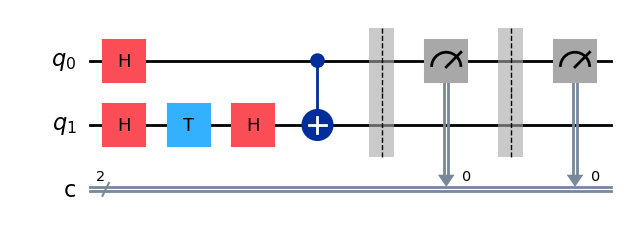

In [31]:
### BEGIN SOLUTION ###
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.t(1)
qc.h(1)
qc.cx(0, 1)

### END SOLUTION

# Measurements with barriers to structure the circuit
qc.barrier()
qc.measure(0, 0)
qc.barrier()
qc.measure(0, 0)
qc.draw(output="mpl", style="iqp")

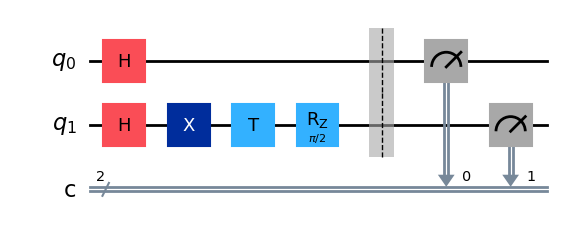

In [32]:
# Example barrier use
import numpy as np

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.x(1)
qc.t(1)
qc.rz(np.pi/2, 1)

qc.barrier()
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output="mpl", style="iqp")

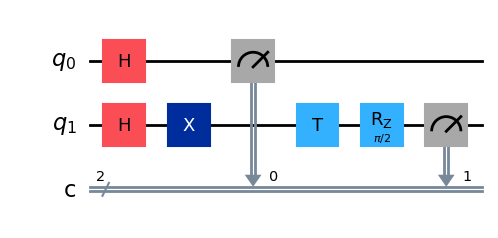

In [33]:
# Example barrier use
import numpy as np

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.x(1)
qc.t(1)
qc.rz(np.pi/2, 1)

qc.measure(0,0)
qc.measure(1,1)
qc.draw(output="mpl", style="iqp")

/var/folders/vk/hqmx8gw16vd_vkfc0x219kb80000gn/T/ipykernel_10347/2758230245.py:6: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('aer_simulator')


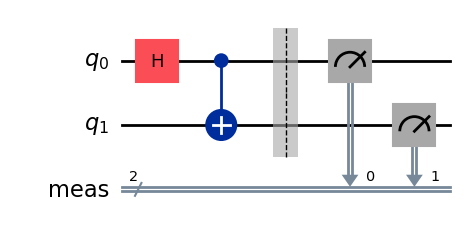

In [34]:
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_qsphere, plot_bloch_vector
from qiskit.visualization import array_to_latex

# Create a simulator object to be used
simulator = Aer.get_backend('aer_simulator')

# Create a simple circuit with entangled qubits
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)
bell.measure_all()
bell.draw(output="mpl", style="iqp")

In [35]:
result = simulator.run(bell).result()
result.get_counts()

{'00': 491, '11': 533}

In [36]:
result2 = simulator.run(bell, shots=1).result()
result2.get_counts()

{'00': 1}

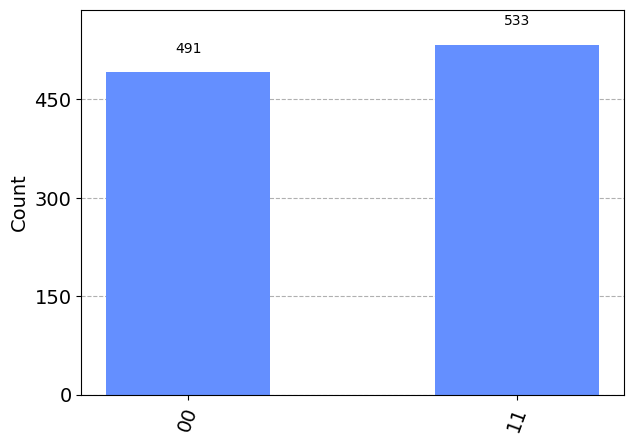

In [37]:
plot_histogram(result.get_counts())

In [38]:
import numpy as np
simulator = Aer.get_backend('aer_simulator')

## BEGIN SOLUTION ##
# Create a simple circuit with entangled qubits
bell = QuantumCircuit(2)
bell.h(0)
bell.ry(np.pi/6, 0)
bell.cx(0,1)

bell.measure_all()
bell.draw()

## END SOLUTION ## 

┌───┐┌─────────┐      ░ ┌─┐   
   q_0: ┤ H ├┤ Ry(π/6) ├──■───░─┤M├───
        └───┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ────────────────┤ X ├─░──╫─┤M├
                        └───┘ ░  ║ └╥┘
meas: 2/═════════════════════════╩══╩═
                                 0  1

{'00': 225, '11': 799}
355.1111111111111


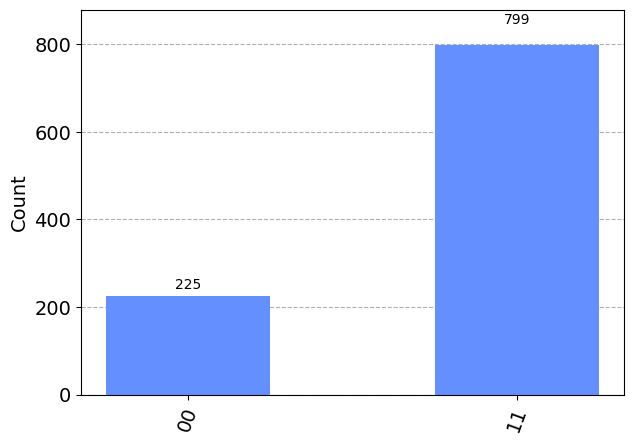

In [39]:
## BEGIN SOLUTION ##
result = simulator.run(bell, shots=1024).result()
counts = result.get_counts()
print(counts)
print(counts["11"]/counts["00"] * 100)
plot_histogram(result.get_counts())
## END SOLUTION ## 

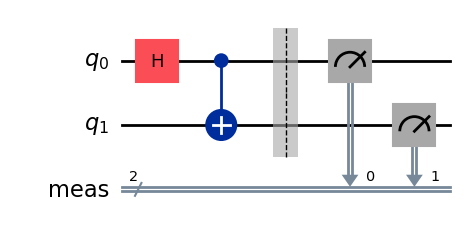

In [40]:
from qiskit.quantum_info import Statevector

# Create a simple circuit with entangled qubits
bell = QuantumCircuit(2)
stv0 = Statevector.from_instruction(bell)
bell.h(0)
stv1 = Statevector.from_instruction(bell)
bell.cx(0,1)
stv2 = Statevector.from_instruction(bell)
bell.measure_all()
bell.draw(output="mpl", style="iqp")

In [41]:
print(stv0)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [42]:
from qiskit.visualization import array_to_latex
# Initial state with qubits initialized to 0
array_to_latex(stv0)

<IPython.core.display.Latex object>

In [43]:
array_to_latex(stv1)

<IPython.core.display.Latex object>

In [44]:
array_to_latex(stv2)

<IPython.core.display.Latex object>

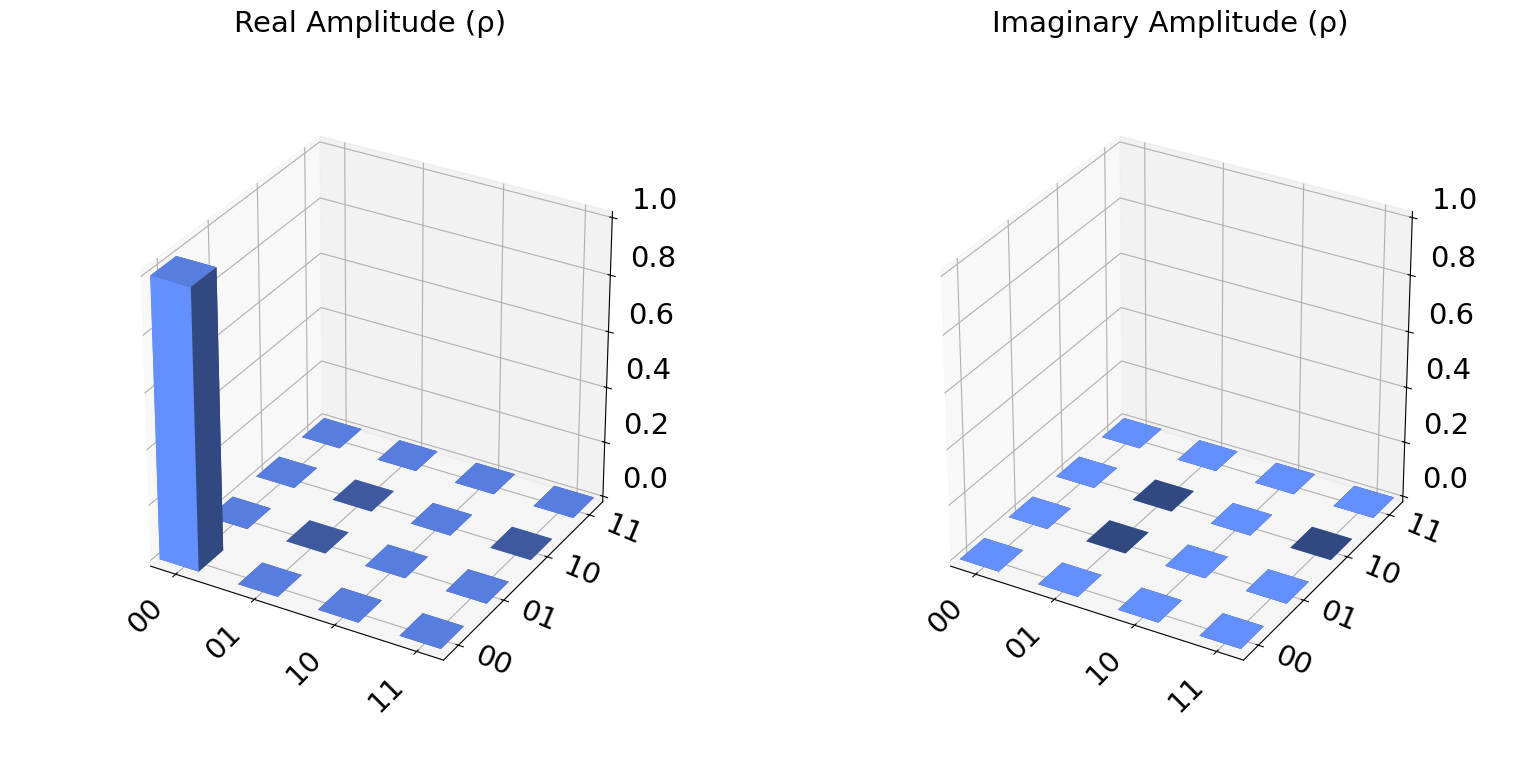

In [45]:
plot_state_city(stv0)

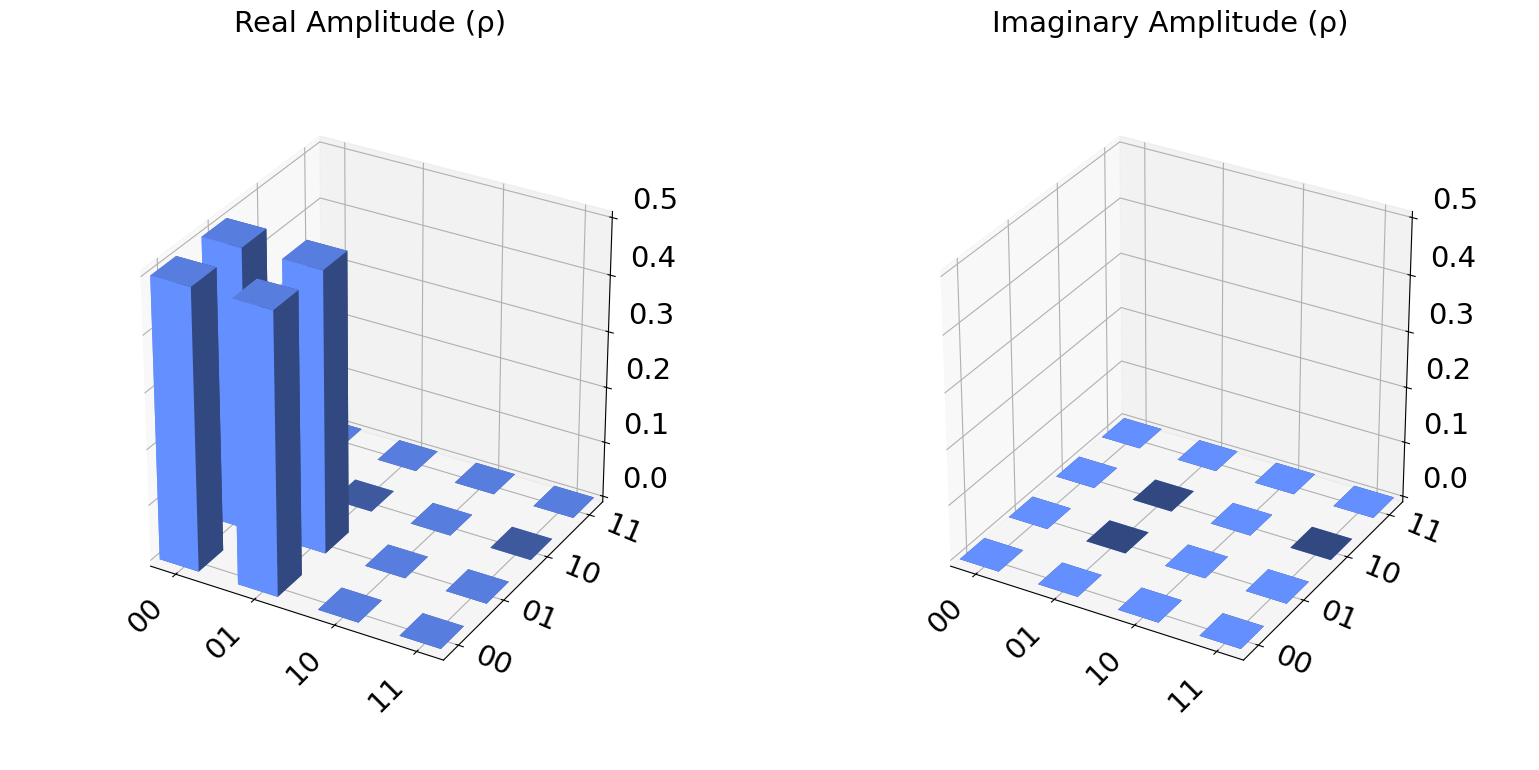

In [46]:
plot_state_city(stv1)

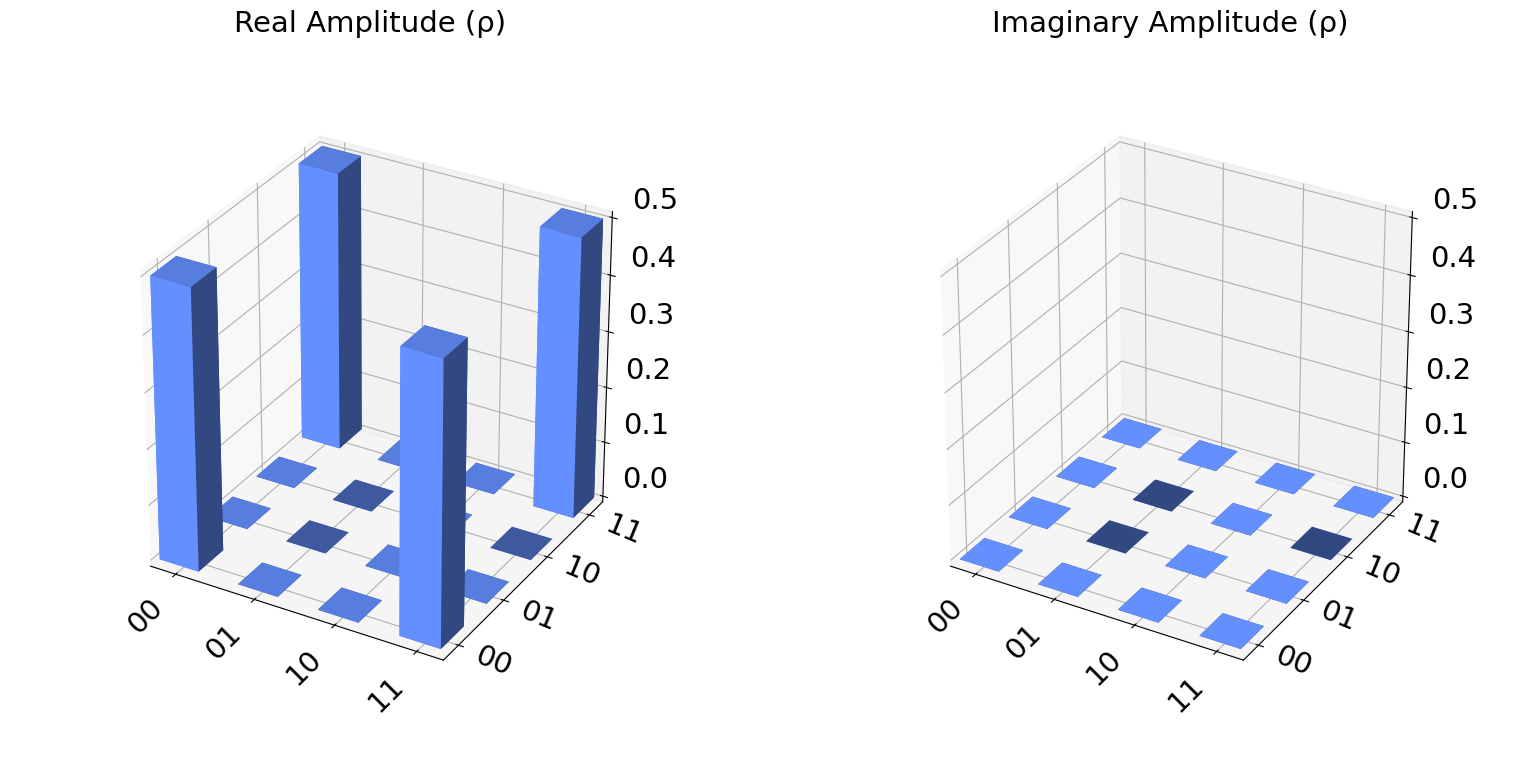

In [47]:
plot_state_city(stv2)

In [48]:
# Construct the noise model from backend properties
from qiskit import execute
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit.providers.aer.noise import NoiseModel

device_backend = FakeVigoV2()

# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.coupling_map

noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('aer_simulator')

result_noise = execute(bell, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()

/var/folders/vk/hqmx8gw16vd_vkfc0x219kb80000gn/T/ipykernel_10347/3921862244.py:4: DeprecationWarning: Importing from 'qiskit.providers.aer' is deprecated. Import from 'qiskit_aer' instead, which should work identically.
  from qiskit.providers.aer.noise import NoiseModel
/var/folders/vk/hqmx8gw16vd_vkfc0x219kb80000gn/T/ipykernel_10347/3921862244.py:6: DeprecationWarning: The class ``qiskit.providers.fake_provider.fake_backend.FakeBackendV2`` is deprecated as of qiskit 0.46.0. It will be removed in qiskit 1.0. All fake backend instances based on real device snapshots (`FakeVigo`,`FakeSherbrooke`,...) have been migrated to the `qiskit_ibm_runtime` package. To migrate your code, run `pip install qiskit-ibm-runtime` and use `from qiskit_ibm_runtime.fake_provider import FakeExample` instead of `from qiskit.providers.fake_provider import FakeExample`. 
  device_backend = FakeVigoV2()
/var/folders/vk/hqmx8gw16vd_vkfc0x219kb80000gn/T/ipykernel_10347/3921862244.py:21: DeprecationWarning: The fu

NoiseModel:
  Basis gates: ['cx', 'delay', 'id', 'measure', 'rz', 'sx', 'x']
  Instructions with noise: ['x', 'measure', 'sx', 'cx', 'id']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (3, 4)), ('cx', (4, 3)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


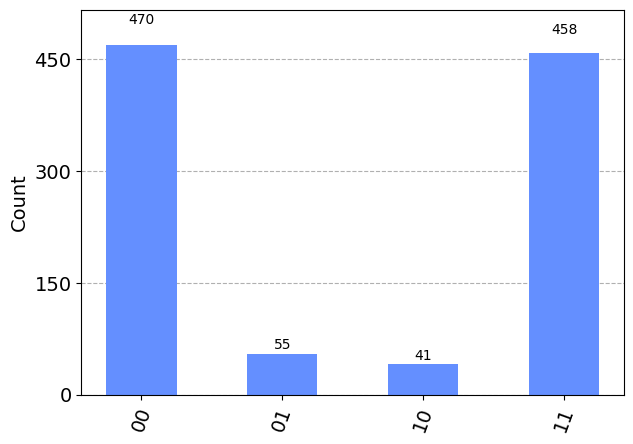

In [49]:
plot_histogram(result_noise.get_counts())

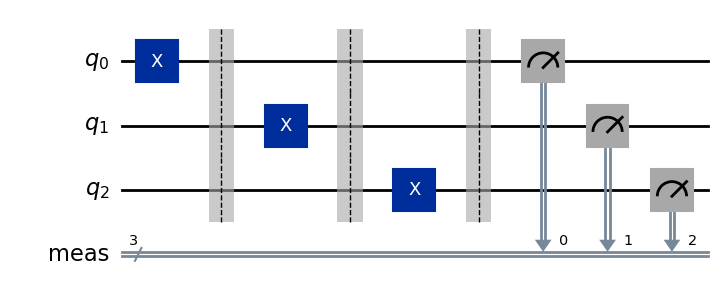

In [50]:
circ = QuantumCircuit(3)
circ.x(0)  # x on qubit 0
circ.barrier()
circ.x(1)  # x on qubit 1
circ.barrier()
circ.x(2)  # x on qubit 2

circ.measure_all()
circ.draw(output="mpl", style="iqp")

In [51]:
# Define helper function to measure circuits with different qubits being X'ed
def do_x_on(qubit_idx):
    circ = QuantumCircuit(3)
    circ.x(qubit_idx)
    circ.measure_all()
    result = simulator.run(circ).result()
    print(f"Result for X on Qubit with index {qubit_idx}: {list(result.get_counts().keys())[0]}")
    return circ

Result for X on Qubit with index 0: 001


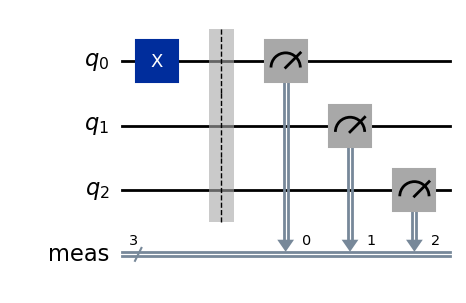

In [52]:
circ = do_x_on(0)
circ.draw(output="mpl", style="iqp")

In [53]:
do_x_on(0)
do_x_on(1)
do_x_on(2)

Result for X on Qubit with index 0: 001
Result for X on Qubit with index 1: 010
Result for X on Qubit with index 2: 100


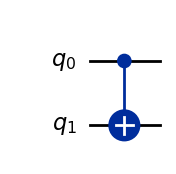

In [54]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

circ = QuantumCircuit(2)
circ.cx(0, 1)
circ.draw(output="mpl", style="iqp")

In [55]:
print('Little endian (QISKIT):')
array_to_latex(Operator(circ), prefix="CNOT=")

Little endian (QISKIT):


<IPython.core.display.Latex object>

In [56]:
print('Big endian (TEXTBOOKS):')
array_to_latex(Operator(circ.reverse_bits()), prefix="CNOT=")

Big endian (TEXTBOOKS):


<IPython.core.display.Latex object>